In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.drop(["car_ID"], axis = 1)

In [7]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [9]:
df["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
ls = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "fuelsystem", "enginetype", "cylindernumber"]

In [11]:
for x in ls:
    lb = LabelEncoder()
    df[x] = lb.fit_transform(df[x])
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
df["CarName"].unique()

array([  2,   3,   1,   4,   5,   9,   7,   6,   8,  10,  11,  12,  15,
        13,  14,  24,  25,  26,  35,  27,  32,  34,  29,  28,  30,  33,
        31,  39,  43,  37,  38,  42,  36,  41,  44,  40,  47,  45,  46,
        49,  48,  50,  52,  51,  61,  59,  58,  53,  54,  60,  55,  57,
        56,  19,  17,  16,  22,  20,  23,  18,  21,  62,  65,  64,  68,
        63,  66,  67,  69,   0,  73,  81,  76,  83,  77,  74,  78,  70,
        79,  71,  72,  80,  82,  75,  85,  84,  86,  88,  87,  92,  89,
        93,  91,  94,  90,  98,  95,  97,  96,  99, 100, 101, 103, 102,
       104, 107, 106, 105, 108, 109, 110, 111, 123, 120, 116, 121, 117,
       112, 125, 115, 118, 114, 119, 122, 126, 127, 124, 113, 128, 129,
       130, 133, 137, 131, 136, 132, 145, 146, 134, 135, 139, 138, 140,
       141, 143, 144, 142])

<Axes: >

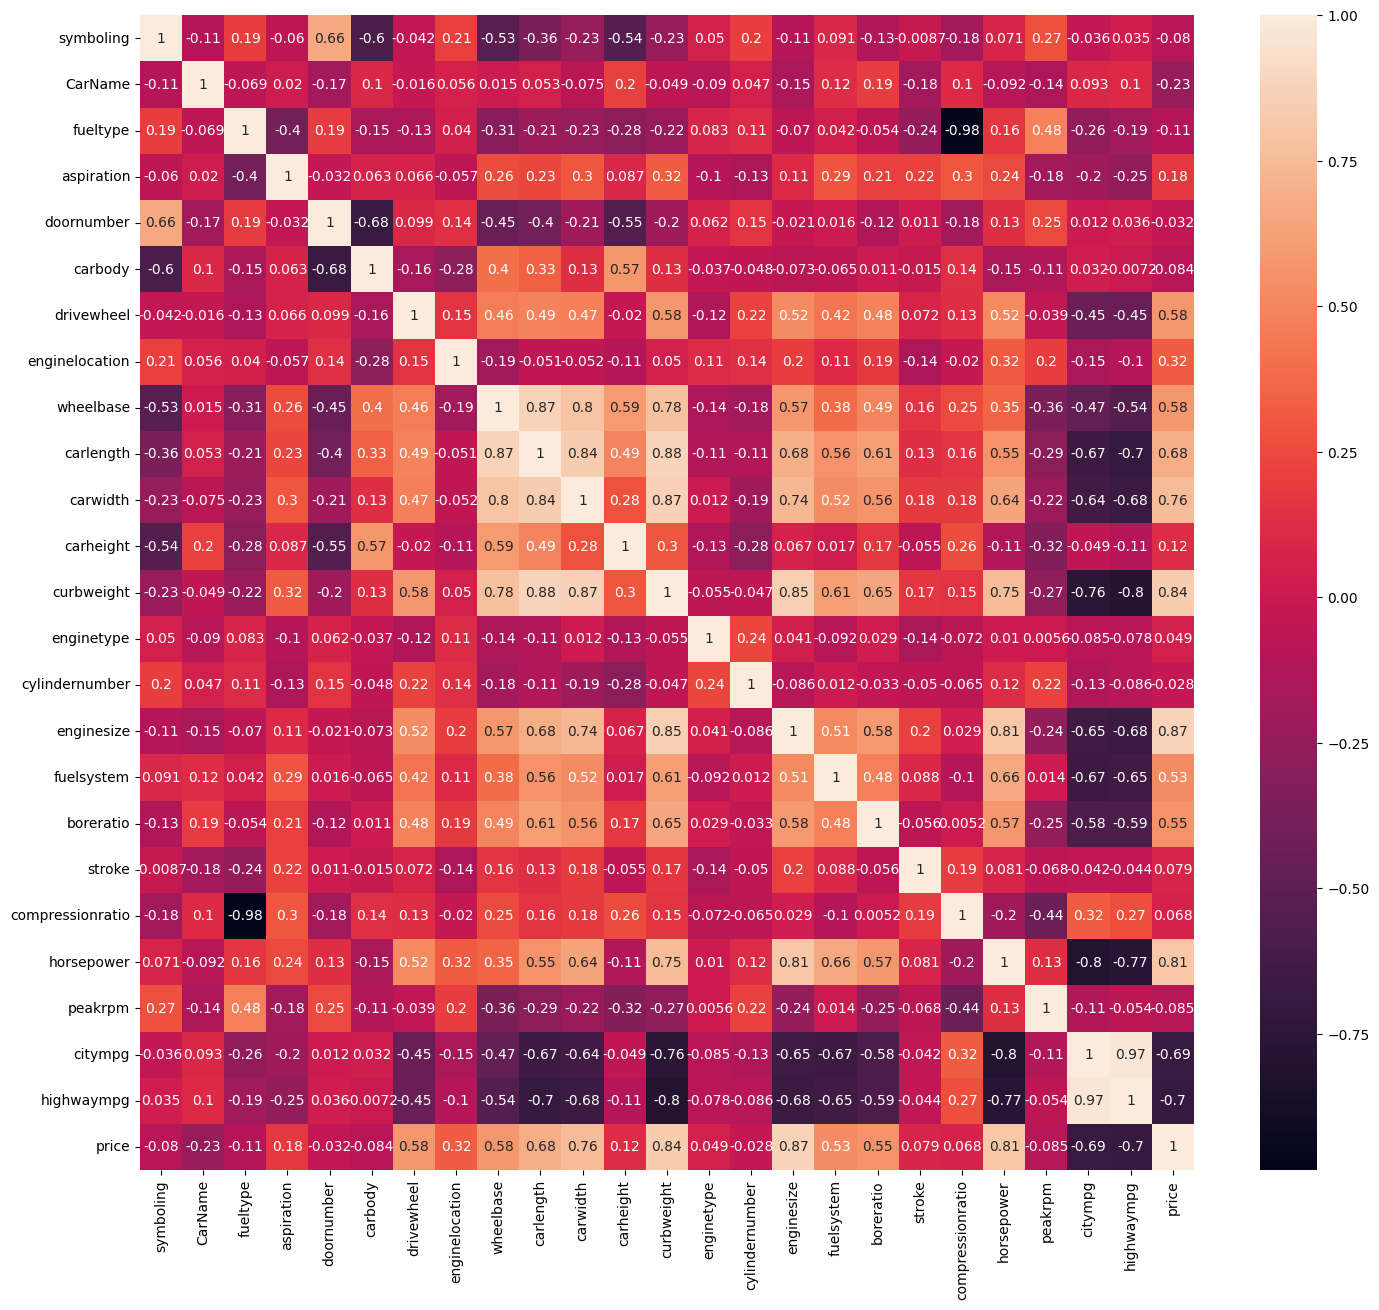

In [13]:
plt.figure(figsize = (17, 15))
sns.heatmap(df.corr(), annot = True)

In [14]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

Selected Features:
['horsepower', 'curbweight', 'highwaympg', 'enginesize', 'citympg', 'carwidth', 'wheelbase', 'carlength', 'fuelsystem', 'boreratio', 'stroke', 'carheight']


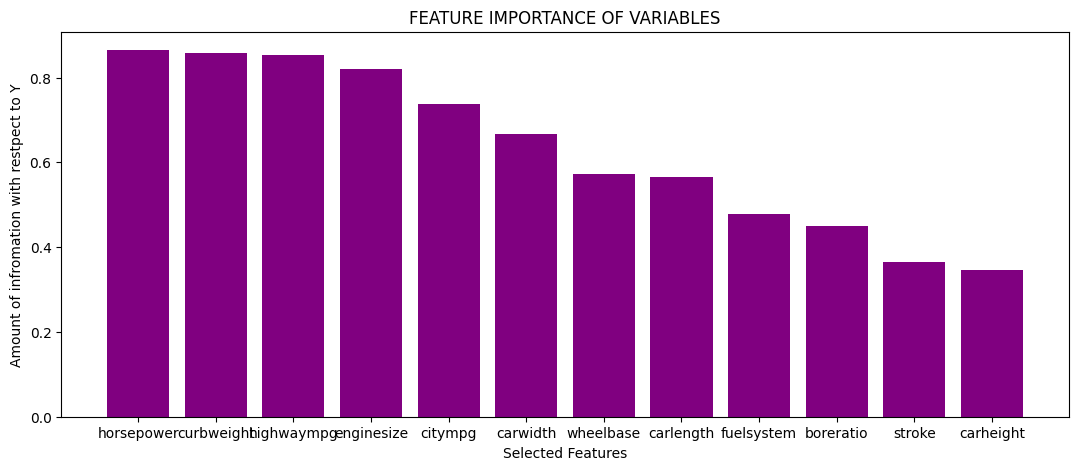

In [15]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,f_regression
import numpy as np
import matplotlib.pyplot as plt
k = 12
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
#plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

In [16]:
x = df[['horsepower', 'curbweight', 'highwaympg', 'enginesize', 'citympg', 'carwidth', 'wheelbase', 'carlength', 'fuelsystem', 'boreratio', 'stroke', 'carheight']]

In [17]:
x

,horsepower,curbweight,highwaympg,enginesize,citympg,carwidth,wheelbase,carlength,fuelsystem,boreratio,stroke,carheight
0,111,2548,27,130,21,64.1,88.6,168.8,5,3.47,2.68,48.8
1,111,2548,27,130,21,64.1,88.6,168.8,5,3.47,2.68,48.8
2,154,2823,26,152,19,65.5,94.5,171.2,5,2.68,3.47,52.4
3,102,2337,30,109,24,66.2,99.8,176.6,5,3.19,3.40,54.3
4,115,2824,22,136,18,66.4,99.4,176.6,5,3.19,3.40,54.3
...,...,...,...,...,...,...,...,...,...,...,...,...
200,114,2952,28,141,23,68.9,109.1,188.8,5,3.78,3.15,55.5
201,160,3049,25,141,19,68.8,109.1,188.8,5,3.78,3.15,55.5
202,134,3012,23,173,18,68.9,109.1,188.8,5,3.58,2.87,55.5
203,106,3217,27,145,26,68.9,109.1,188.8,3,3.01,3.40,55.5


In [18]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

## Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
print("rsquared value:", r2_score(rf_pred,y_test))
print("mse value:", mean_squared_error(rf_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(rf_pred,y_test)))
print("mae value:", mean_absolute_error(rf_pred,y_test))

rsquared value: 0.9312523756811597
mse value: 3178896.6152572427
rmse value: 1782.94604945221
mae value: 1408.6991937634407


## Linear Regression Model

In [21]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_pred = lr_model.predict(x_test)
print("rsquared value:", r2_score(lr_pred,y_test))
print("mse value:", mean_squared_error(lr_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(lr_pred,y_test)))
print("mae value:", mean_absolute_error(lr_pred,y_test))

rsquared value: 0.7510708904302019
mse value: 8857747.634561436
rmse value: 2976.1968406947544
mae value: 2277.4097517839177
